# Import Required Libraries

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# sklearn libraries

# Load your dataset in python

In [3]:
data = pd.read_csv("Telco-Customer-Churn.csv")
data.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [4]:
pd.set_option('display.max_columns',21)
data.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

# Verify your dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
pd.to_numeric(data.TotalCharges)

ValueError: Unable to parse string " " at position 488

In [11]:
data.iloc[488]

customerID                         4472-LVYGI
gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [7]:
pd.to_numeric(data.TotalCharges,errors='coerce')  # introduce NaN (Not a Number) where ever there is error in parsing

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [8]:
data.TotalCharges = pd.to_numeric(data.TotalCharges,errors='coerce')

In [9]:
data.iloc[488]

customerID                         4472-LVYGI
gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                              NaN
Churn                                      No
Name: 488, dtype: object

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Extract Features and Target

In [14]:
x = data.iloc[:,1:20]
x.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  
0              Yes           Electronic check           29.85         29.85  
1               No               Mailed check           56.95       1889.50  
2              Yes               Mailed check           53.85        108.15  
3               No  Bank transfer (automatic)           42.30       1840.75  
4              Yes           Electronic check           70.70        151.65

In [15]:
y = data.Churn
y.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

# Split your data into training and testing datasets

In [12]:
from sklearn.model_selection import train_test_split

In [16]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.85,random_state=4892)

In [22]:
xtrain.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
5023  Female              0      No         No       1          Yes   
2614  Female              0     Yes        Yes      67          Yes   
6823  Female              0      No         No       4          Yes   
1881    Male              0      No         No      26           No   
5488    Male              1     Yes         No      45          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
5023                No     Fiber optic             No           No   
2614               Yes     Fiber optic            Yes           No   
6823                No             DSL            Yes           No   
1881  No phone service             DSL            Yes          Yes   
5488               Yes     Fiber optic             No          Yes   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
5023               No          No          No              No  Month-to-month   
2614               No         Yes          No             Yes        One year   
6823               No          No          No              No  Month-to-month   
1881               No          No          No             Yes  Month-to-month   
5488              Yes         Yes         Yes              No        One year   

     PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  
5023              Yes           Electronic check           70.30         70.30  
2614              Yes    Credit card (automatic)           94.35       6341.45  
6823              Yes  Bank transfer (automatic)           50.55        235.65  
1881              Yes  Bank transfer (automatic)           44.65       1156.55  
5488              Yes  Bank transfer (automatic)           98.70       4525.80

In [23]:
ytrain.head()

5023    Yes
2614    Yes
6823     No
1881     No
5488     No
Name: Churn, dtype: object

In [24]:
xtest.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
2721    Male              1      No         No      10          Yes   
6255    Male              1     Yes         No      69          Yes   
886   Female              1      No         No       7          Yes   
3412    Male              0     Yes        Yes       2          Yes   
6499    Male              0      No         No       1          Yes   

     MultipleLines InternetService       OnlineSecurity         OnlineBackup  \
2721            No     Fiber optic                   No                   No   
6255           Yes     Fiber optic                  Yes                   No   
886             No     Fiber optic                   No                   No   
3412            No             DSL                  Yes                  Yes   
6499            No              No  No internet service  No internet service   

         DeviceProtection          TechSupport          StreamingTV  \
2721                   No                   No                   No   
6255                  Yes                  Yes                  Yes   
886                   Yes                   No                  Yes   
3412                   No                  Yes                   No   
6499  No internet service  No internet service  No internet service   

          StreamingMovies        Contract PaperlessBilling     PaymentMethod  \
2721                  Yes  Month-to-month              Yes  Electronic check   
6255                  Yes        One year              Yes      Mailed check   
886                    No  Month-to-month              Yes  Electronic check   
3412                   No        Two year               No      Mailed check   
6499  No internet service  Month-to-month               No      Mailed check   

      MonthlyCharges  TotalCharges  
2721           79.25        793.55  
6255          110.55       7610.10  
886            84.35        609.65  
3412           59.50        130.50  
6499           20.30         20.30

In [25]:
ytest.head()

2721    Yes
6255     No
886      No
3412     No
6499     No
Name: Churn, dtype: object

# Data Cleaning
## Missing Value Treatment

In [26]:
xtrain.isnull()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
5023   False          False    False       False   False         False   
2614   False          False    False       False   False         False   
6823   False          False    False       False   False         False   
1881   False          False    False       False   False         False   
5488   False          False    False       False   False         False   
...      ...            ...      ...         ...     ...           ...   
3865   False          False    False       False   False         False   
2520   False          False    False       False   False         False   
2165   False          False    False       False   False         False   
2766   False          False    False       False   False         False   
966    False          False    False       False   False         False   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
5023          False            False           False         False   
2614          False            False           False         False   
6823          False            False           False         False   
1881          False            False           False         False   
5488          False            False           False         False   
...             ...              ...             ...           ...   
3865          False            False           False         False   
2520          False            False           False         False   
2165          False            False           False         False   
2766          False            False           False         False   
966           False            False           False         False   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
5023             False        False        False            False     False   
2614             False        False        False            False     False   
6823             False        False        False            False     False   
1881             False        False        False            False     False   
5488             False        False        False            False     False   
...                ...          ...          ...              ...       ...   
3865             False        False        False            False     False   
2520             False        False        False            False     False   
2165             False        False        False            False     False   
2766             False        False        False            False     False   
966              False        False        False            False     False   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
5023             False          False           False         False  
2614             False          False           False         False  
6823             False          False           False         False  
1881             False          False           False         False  
5488             False          False           False         False  
...                ...            ...             ...           ...  
3865             False          False           False         False  
2520             False          False           False         False  
2165             False          False           False         False  
2766             False          False           False         False  
966              False          False           False         False  

[5986 rows x 19 columns]

In [38]:
data.iloc[488]

customerID                         4472-LVYGI
gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                              NaN
Churn                                      No
Name: 488, dtype: object

In [37]:
data.iloc[488].isnull()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
Name: 488, dtype: bool

<Axes: >

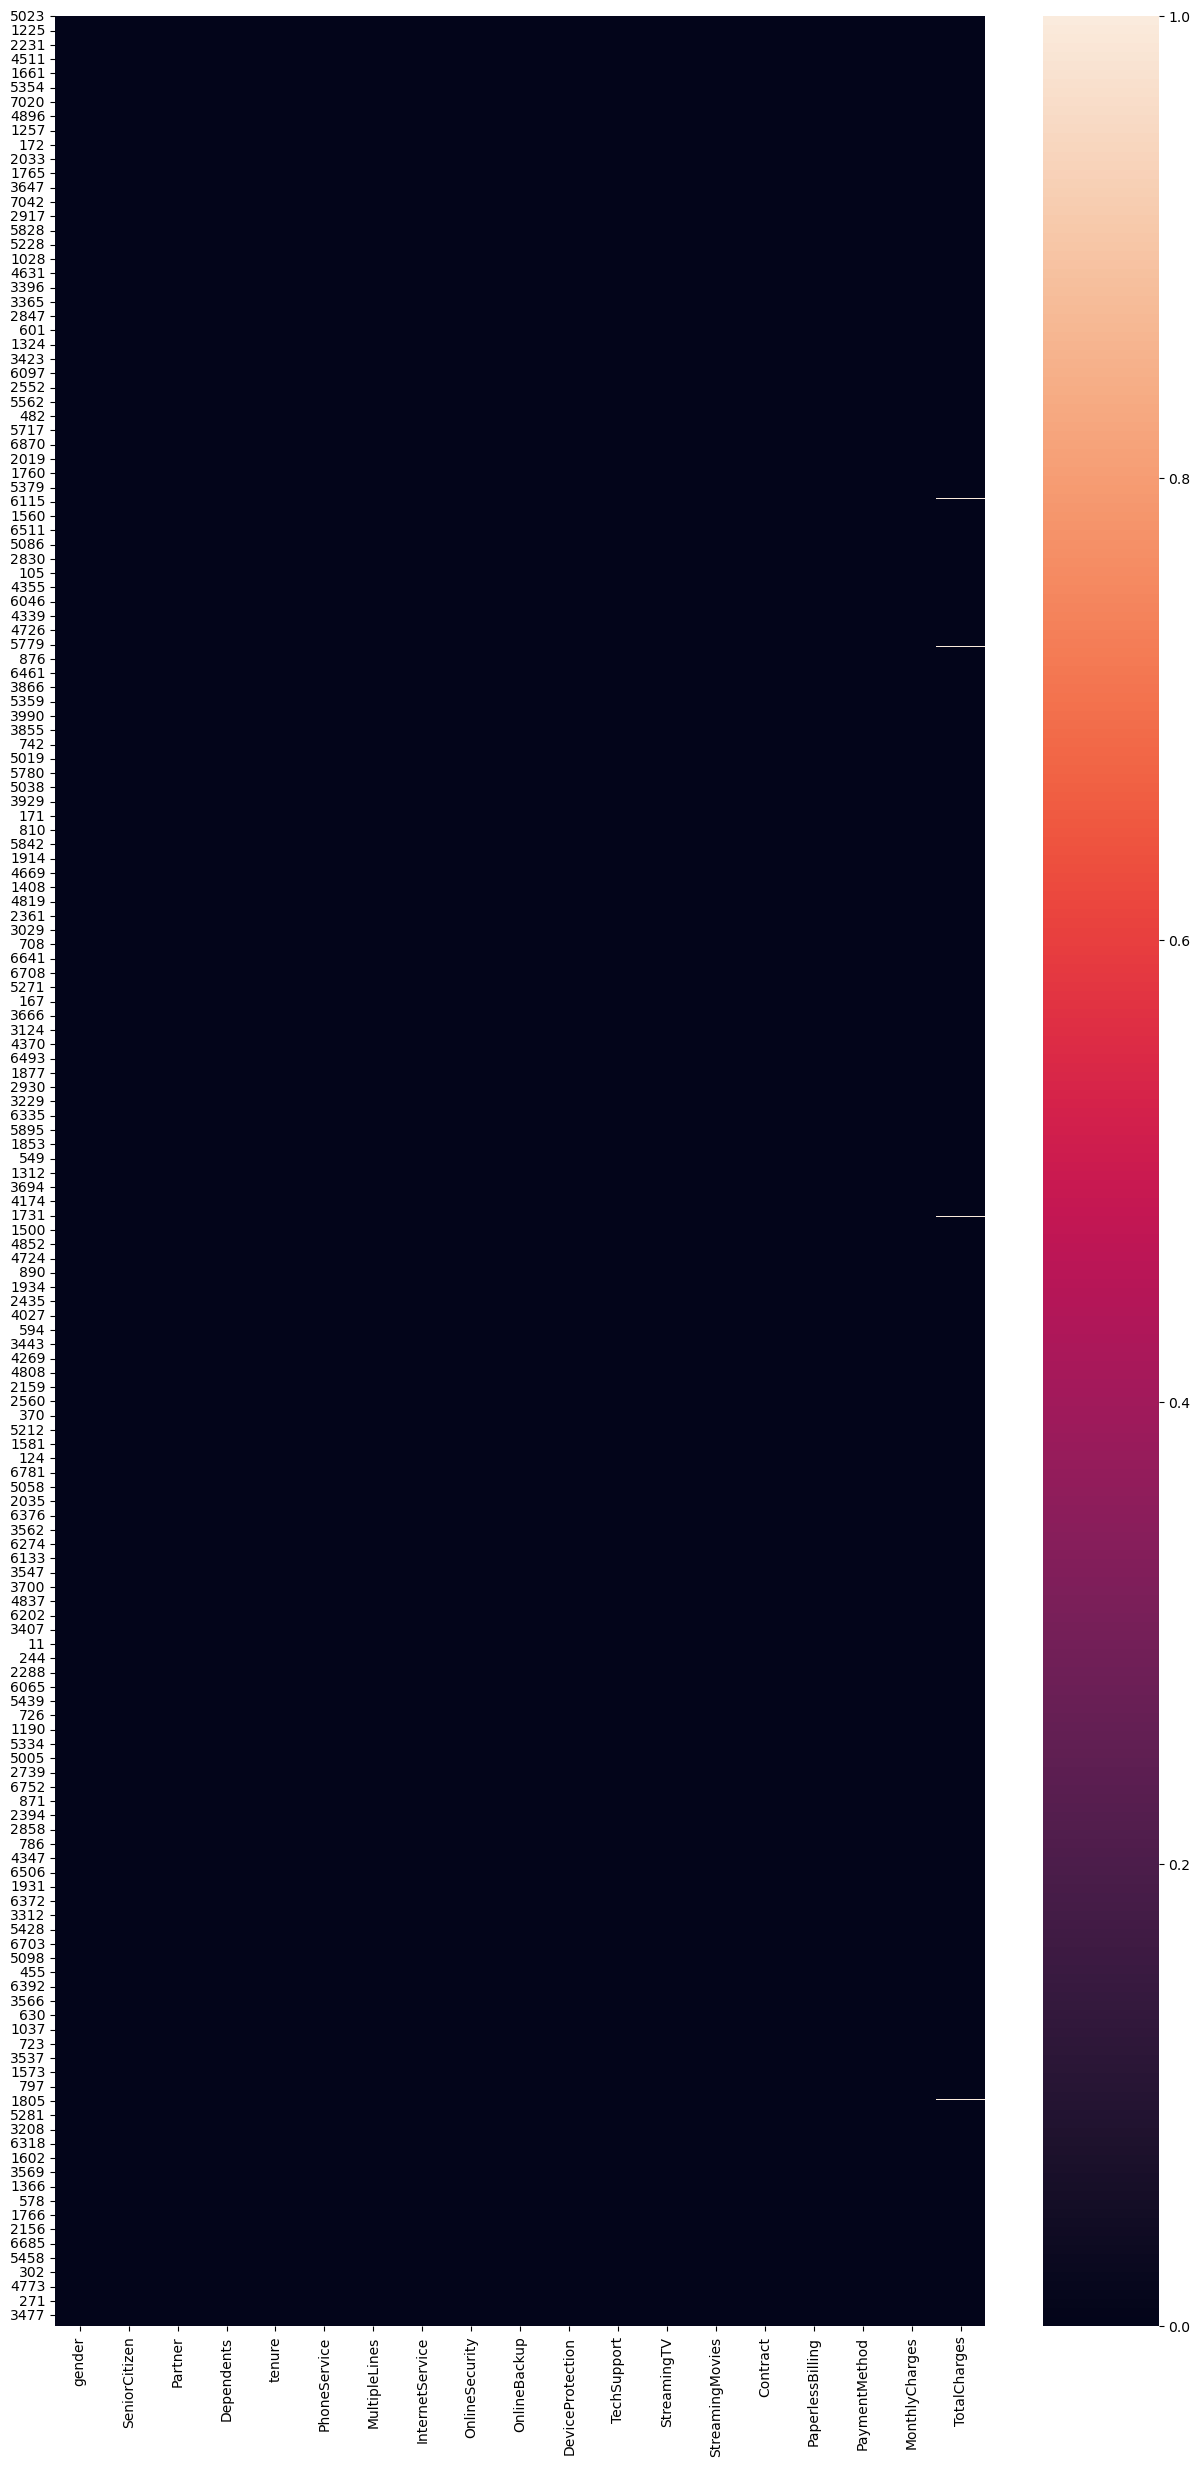

In [33]:
plt.figure(figsize=(15,30))
sns.heatmap(xtrain.isnull())  # visualize missing values across dataframe

In [39]:
xtrain.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
dtype: int64

In [41]:
round(xtrain.isnull().sum() * 100 / xtrain.shape[0],2)

gender              0.00
SeniorCitizen       0.00
Partner             0.00
Dependents          0.00
tenure              0.00
PhoneService        0.00
MultipleLines       0.00
InternetService     0.00
OnlineSecurity      0.00
OnlineBackup        0.00
DeviceProtection    0.00
TechSupport         0.00
StreamingTV         0.00
StreamingMovies     0.00
Contract            0.00
PaperlessBilling    0.00
PaymentMethod       0.00
MonthlyCharges      0.00
TotalCharges        0.18
dtype: float64

In [42]:
xtrain.TotalCharges = xtrain.TotalCharges.fillna(xtrain.TotalCharges.mean())

In [43]:
xtrain.loc[488]

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                      2297.254552
Name: 488, dtype: object

In [46]:
xtest.isnull().sum()  # if missing values in testing, then replace with the TRAINING DATA Mean/Median/Mode

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

## Outlier Treatment

<Axes: >

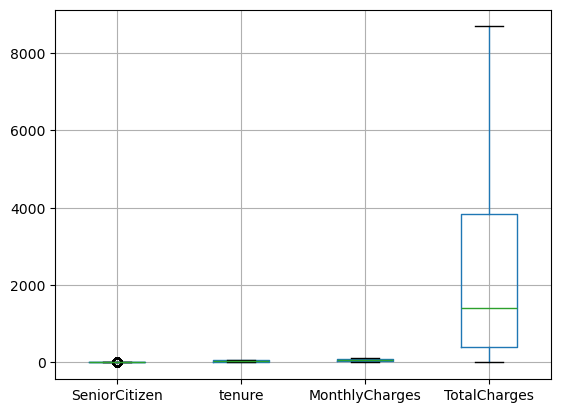

In [50]:
xtrain.boxplot()

In [48]:
xtrain.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    5986.000000  5986.000000     5986.000000   5986.000000
mean        0.161042    32.395256       65.005471   2297.254552
std         0.367601    24.596584       30.102234   2276.281813
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.925000    404.237500
50%         0.000000    29.000000       70.450000   1414.725000
75%         0.000000    56.000000       90.050000   3832.775000
max         1.000000    72.000000      118.750000   8684.800000

<Axes: >

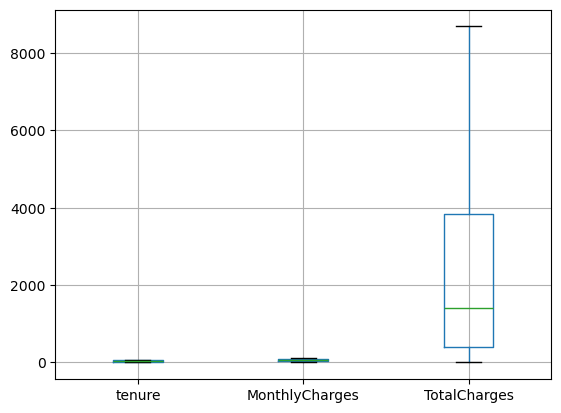

In [49]:
xtrain.boxplot(['tenure','MonthlyCharges','TotalCharges'])

### Loading another dataset for outlier analysis only

In [52]:
out_df = pd.read_csv('winequality.csv')
out_df.head()

fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
0   7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6                                                                                                                     
1  6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9...                                                                                                                     
2  8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;1...                                                                                                                     
3  7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...                                                                                                                     
4  7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...

In [53]:
out_df = pd.read_csv('winequality.csv',sep=';')
out_df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

<Axes: >

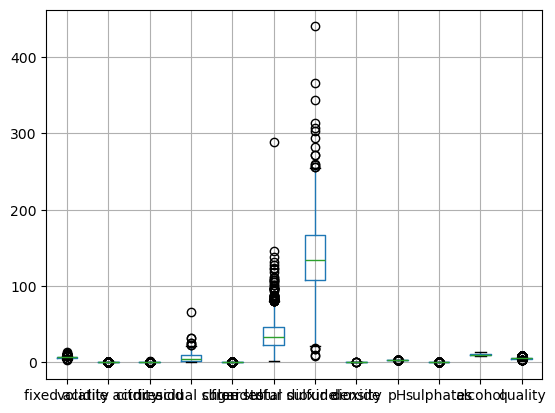

In [54]:
out_df.boxplot()

<Axes: >

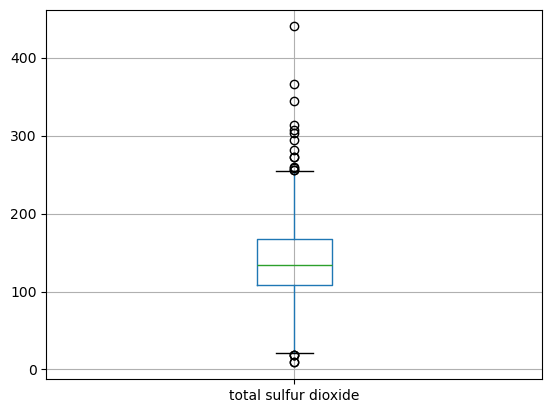

In [55]:
out_df.boxplot(['total sulfur dioxide'])

In [57]:
Q1 = out_df['total sulfur dioxide'].quantile(0.25)
Q3 = out_df['total sulfur dioxide'].quantile(0.75)

IQR = Q3 - Q1

LL = Q1 - 1.5 * IQR
UL = Q3 + 1.5 * IQR

print(f'Q1: {Q1} | Q3: {Q3} | IQR: {IQR} | LL: {LL} | UL: {UL}')

Q1: 108.0 | Q3: 167.0 | IQR: 59.0 | LL: 19.5 | UL: 255.5


In [58]:
ul_outlier_count = out_df[out_df['total sulfur dioxide'] > UL].shape[0]
ll_outlier_count = out_df[out_df['total sulfur dioxide'] < LL].shape[0]

total_outliers = ul_outlier_count + ll_outlier_count

perc_outliers = total_outliers * 100 / out_df.shape[0]

print(f'UL Outlier Count: {ul_outlier_count} | LL Outlier Count: {ll_outlier_count} | Total Outlier Count: {total_outliers} | Outlier%: {perc_outliers}')

UL Outlier Count: 14 | LL Outlier Count: 5 | Total Outlier Count: 19 | Outlier%: 0.38791343405471623


<Axes: >

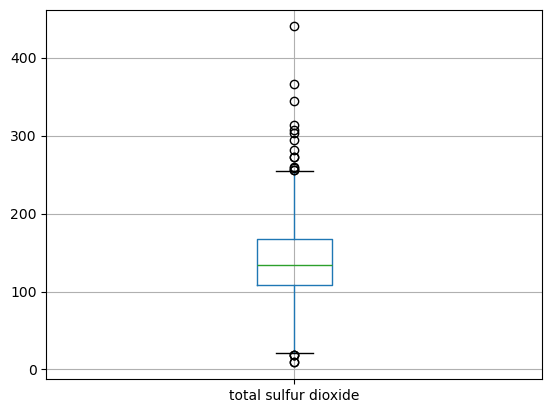

In [59]:
out_df.boxplot(['total sulfur dioxide'])

In [60]:
# my outliers are <=5%, hence replacing them with the corresponding limits
out_df.loc[out_df['total sulfur dioxide'] > UL] = UL
out_df.loc[out_df['total sulfur dioxide'] < LL] = LL

C:\Users\SAUVEER\AppData\Local\Temp\ipykernel_5832\2826737391.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '255.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  out_df.loc[out_df['total sulfur dioxide'] > UL] = UL


<Axes: >

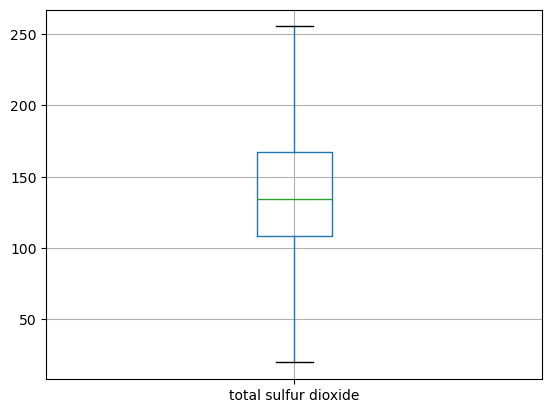

In [61]:
out_df.boxplot(['total sulfur dioxide'])

C:\Users\91702\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


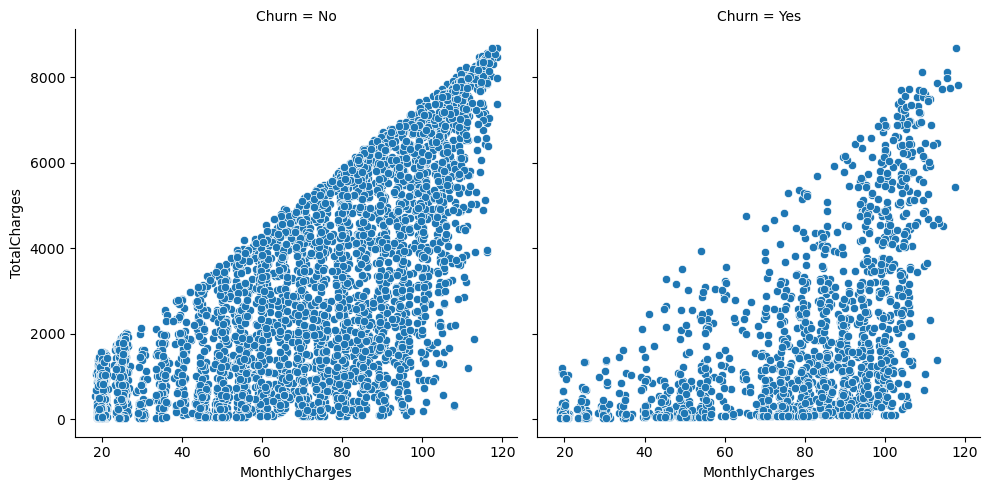

In [18]:
sns.relplot(x='MonthlyCharges',y='TotalCharges',col='Churn',data=data,kind='scatter')

In [19]:
plt.show()

C:\Users\91702\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


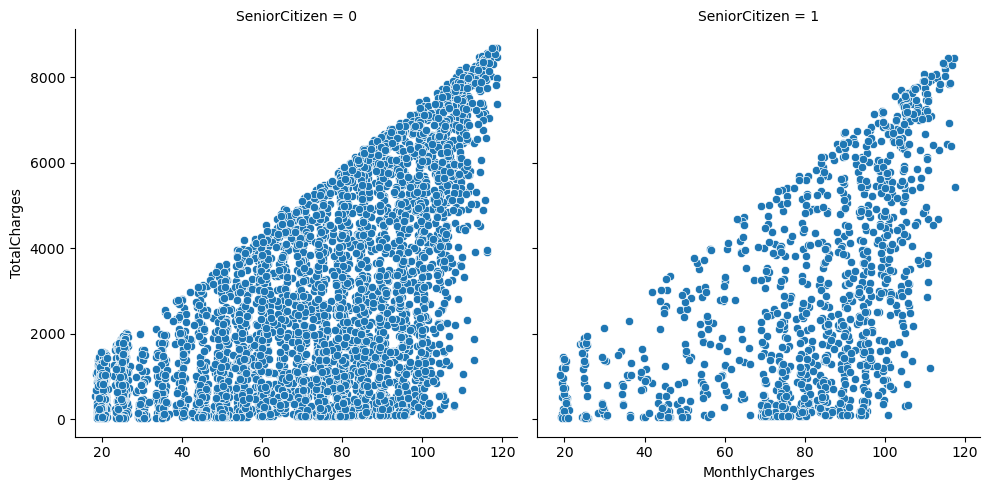

In [20]:
sns.relplot(x='MonthlyCharges',y='TotalCharges',col='SeniorCitizen',data=data,kind='scatter')

C:\Users\91702\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


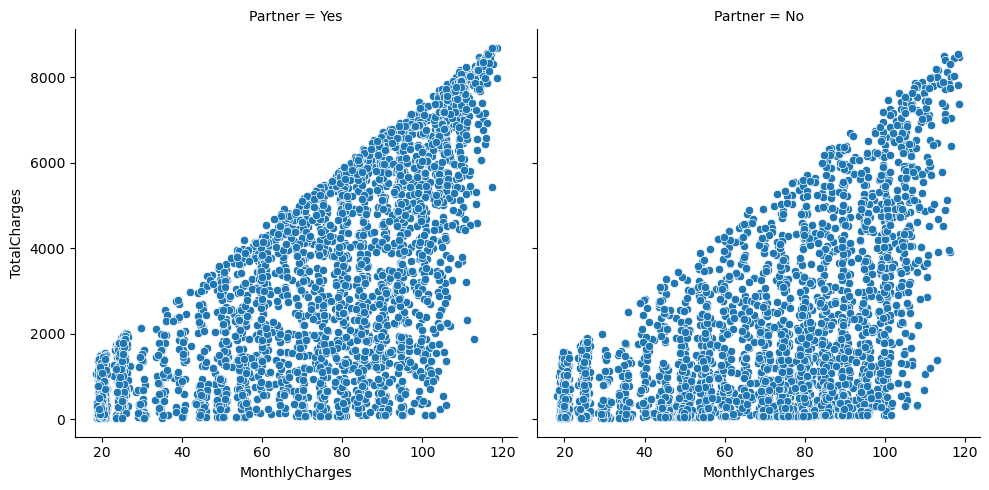

In [21]:
sns.relplot(x='MonthlyCharges',y='TotalCharges',col='Partner',data=data,kind='scatter')

C:\Users\91702\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


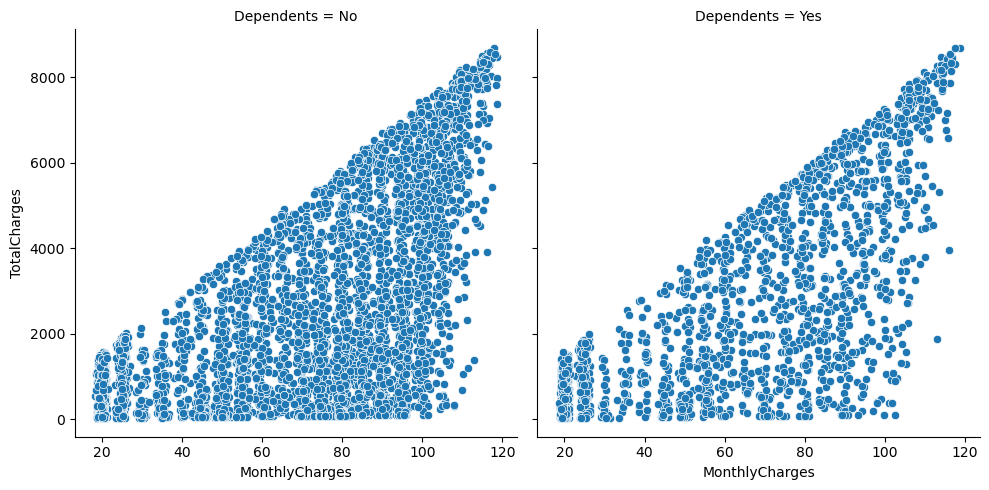

In [27]:
sns.relplot(x='MonthlyCharges',y='TotalCharges',col='Dependents',data=data,kind='scatter')
plt.show()

C:\Users\91702\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


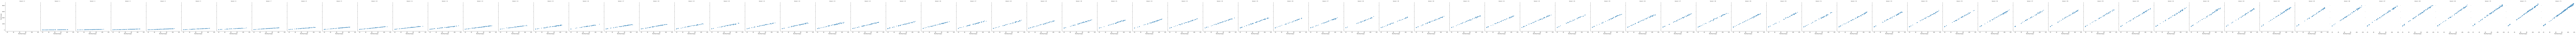

In [25]:
sns.relplot(x='MonthlyCharges',y='TotalCharges',col='tenure',data=data,kind='scatter')

C:\Users\91702\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


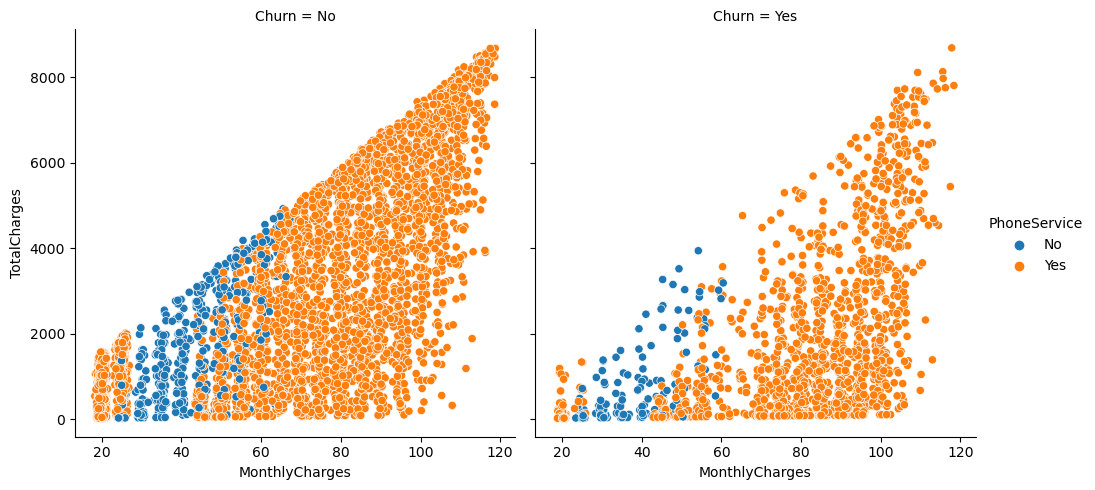

In [40]:
sns.relplot(x='MonthlyCharges',y='TotalCharges',col='Churn',hue='PhoneService',data=data,kind='scatter')

C:\Users\91702\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


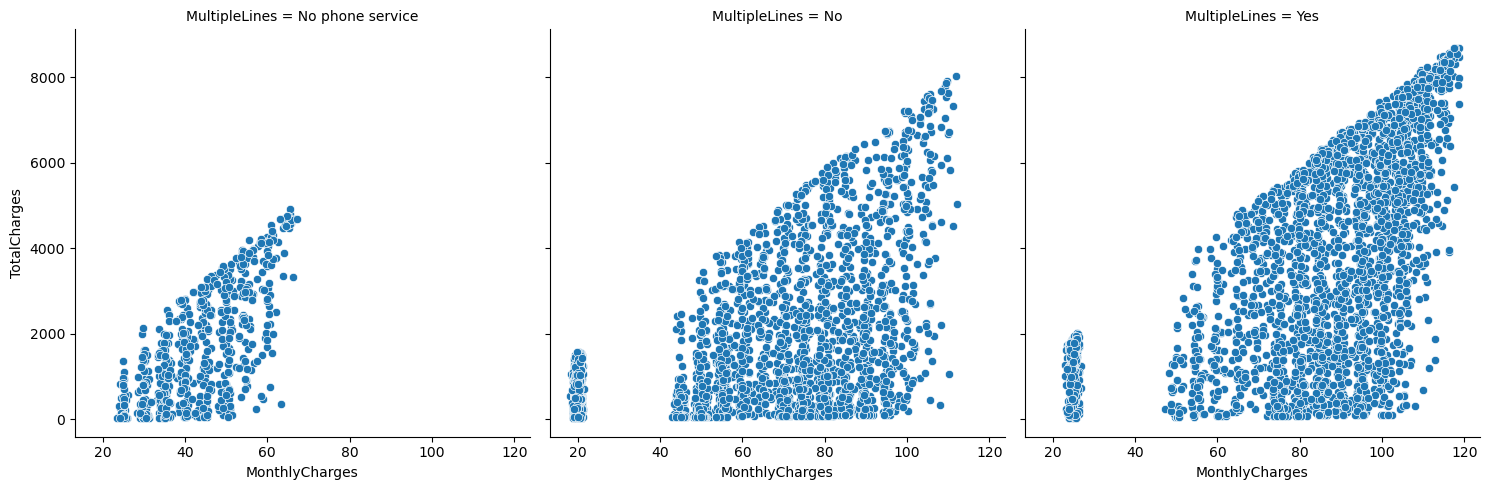

In [29]:
sns.relplot(x='MonthlyCharges',y='TotalCharges',col='MultipleLines',data=data,kind='scatter')

C:\Users\91702\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


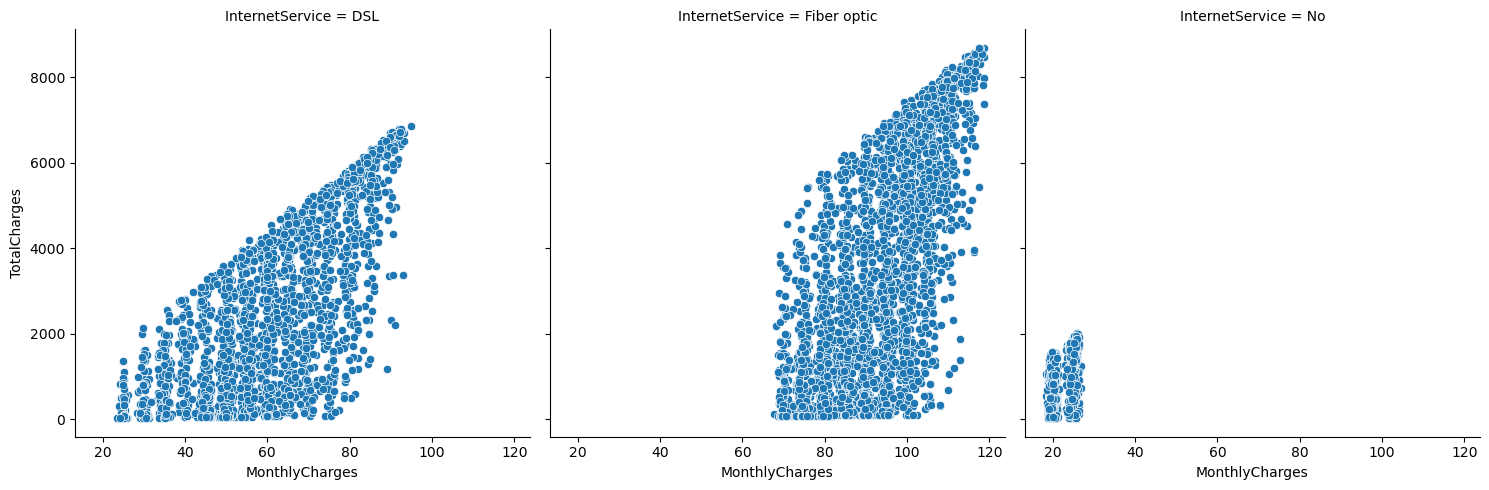

In [30]:
sns.relplot(x='MonthlyCharges',y='TotalCharges',col='InternetService',data=data,kind='scatter')

C:\Users\91702\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


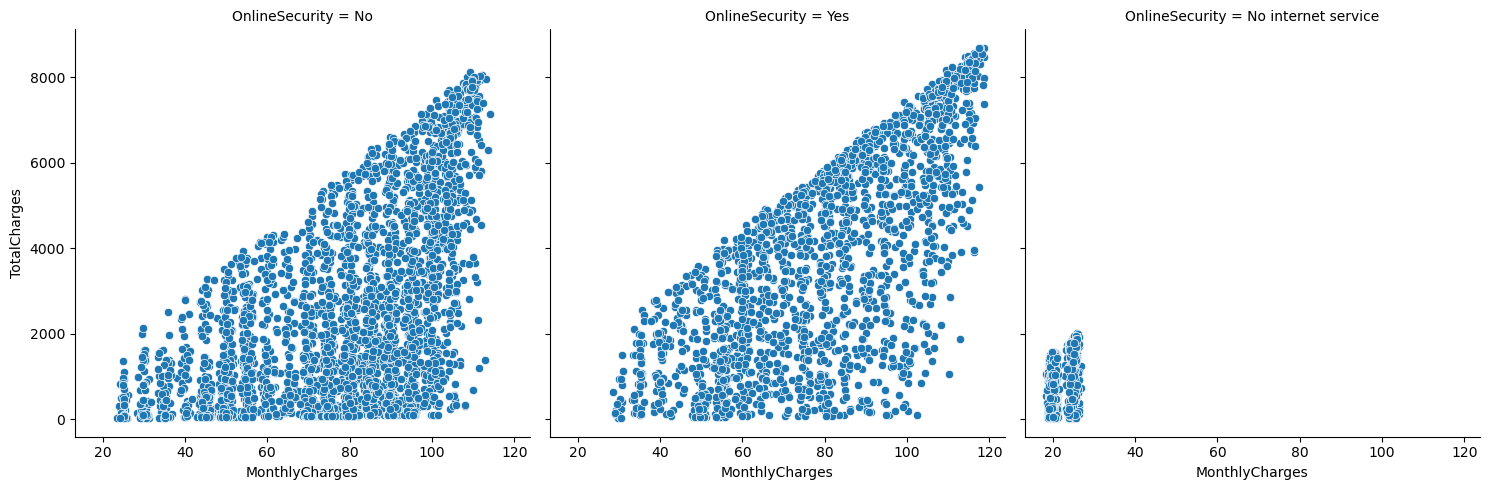

In [31]:
sns.relplot(x='MonthlyCharges',y='TotalCharges',col='OnlineSecurity',data=data,kind='scatter')

C:\Users\91702\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


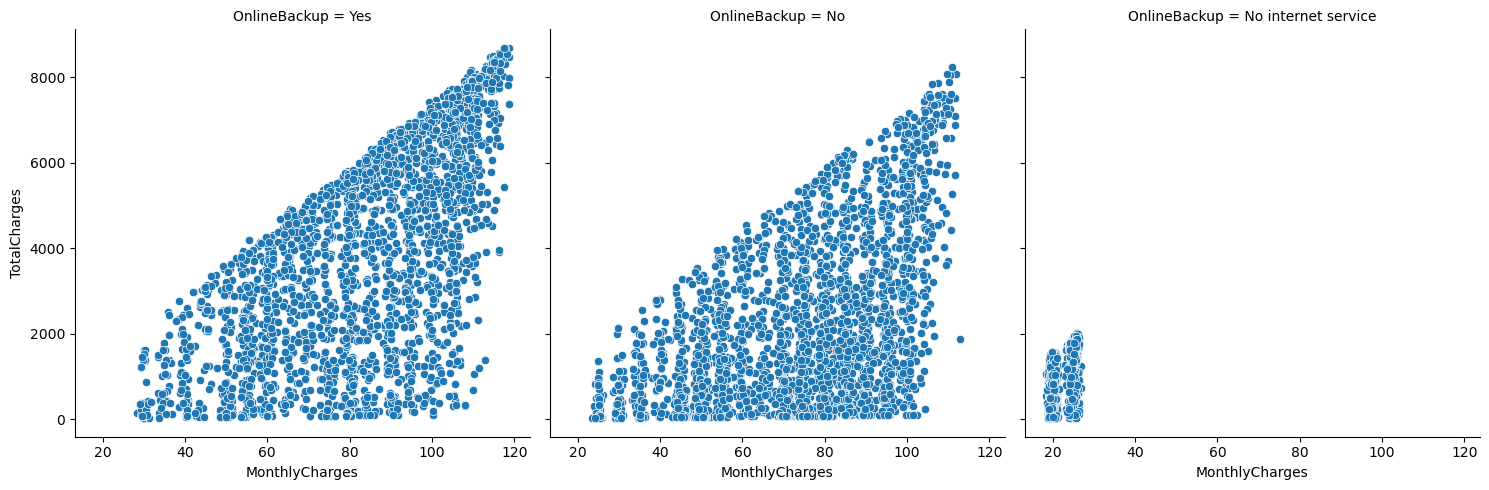

In [32]:
sns.relplot(x='MonthlyCharges',y='TotalCharges',col='OnlineBackup',data=data,kind='scatter')

C:\Users\91702\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


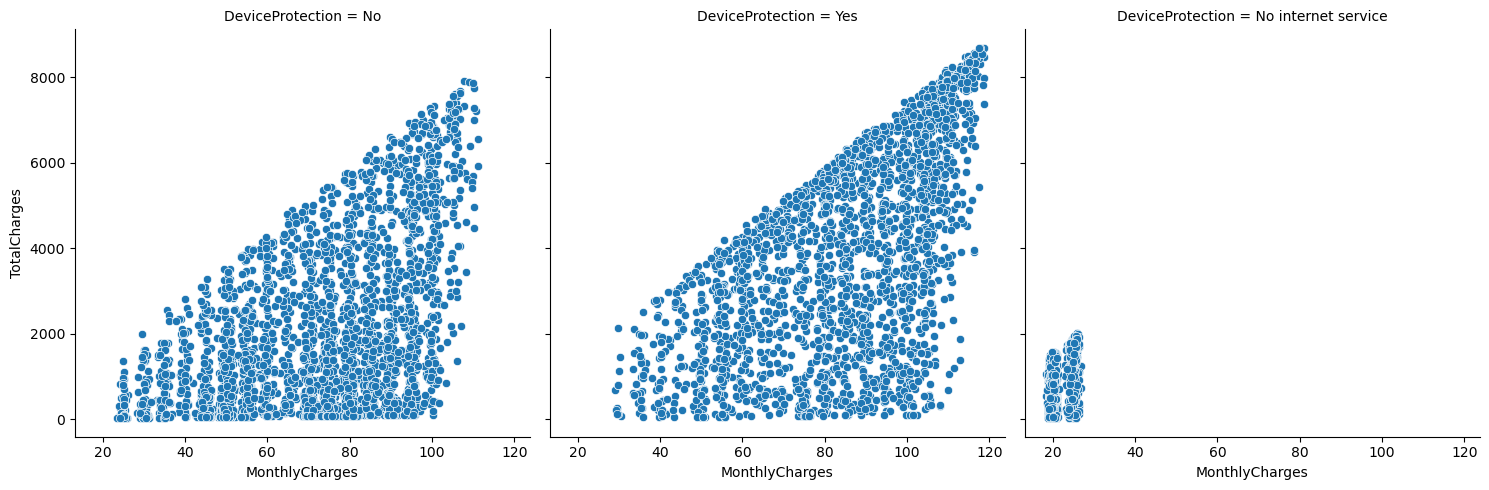

In [33]:
sns.relplot(x='MonthlyCharges',y='TotalCharges',col='DeviceProtection',data=data,kind='scatter')

C:\Users\91702\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


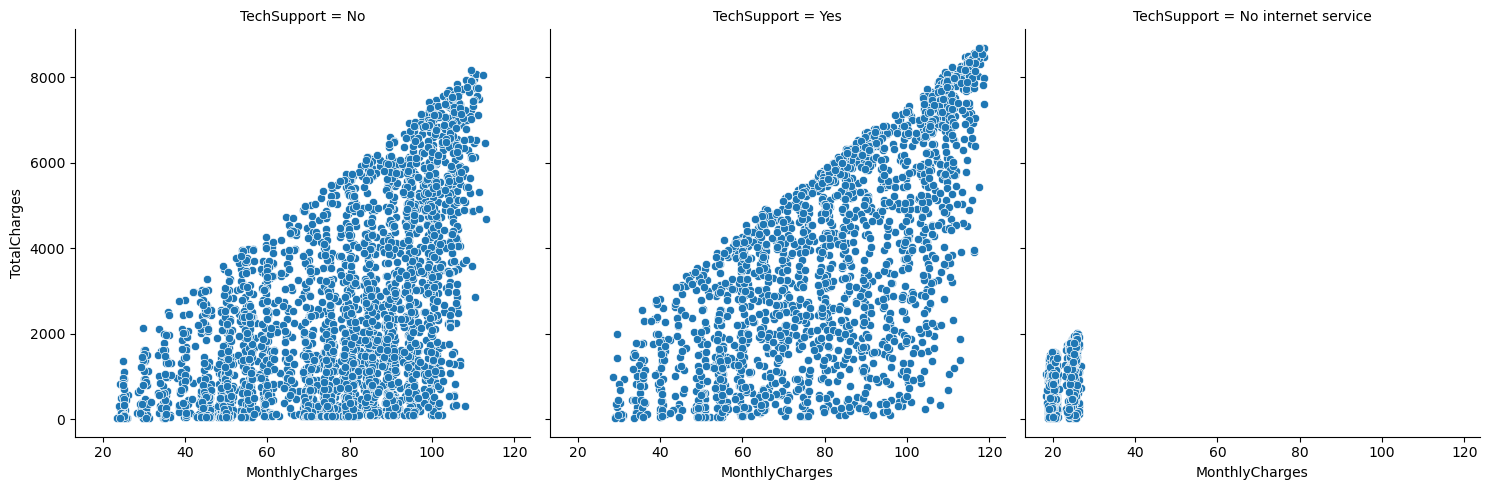

In [34]:
sns.relplot(x='MonthlyCharges',y='TotalCharges',col='TechSupport',data=data,kind='scatter')

C:\Users\91702\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


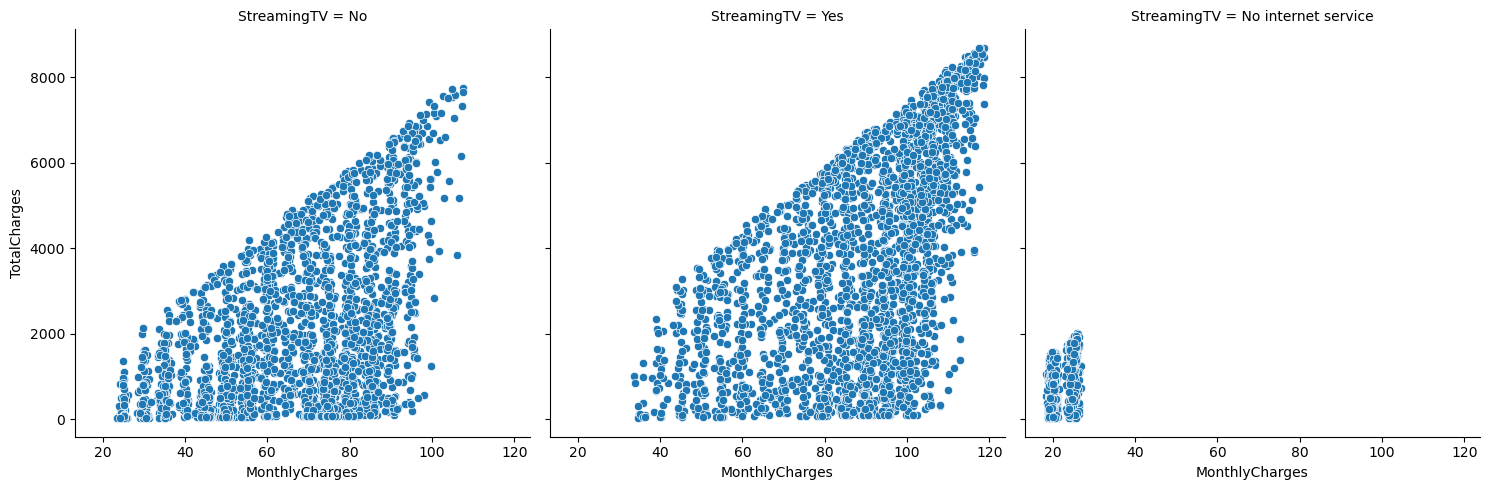

In [35]:
sns.relplot(x='MonthlyCharges',y='TotalCharges',col='StreamingTV',data=data,kind='scatter')

C:\Users\91702\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


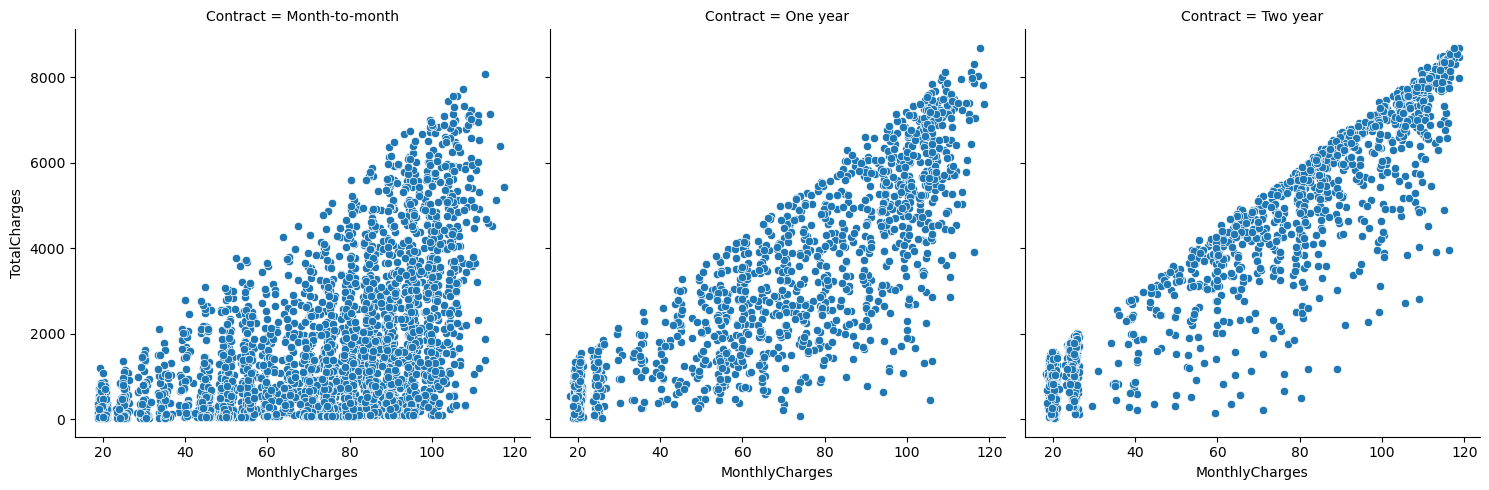

In [36]:
sns.relplot(x='MonthlyCharges',y='TotalCharges',col='Contract',data=data,kind='scatter')

C:\Users\91702\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


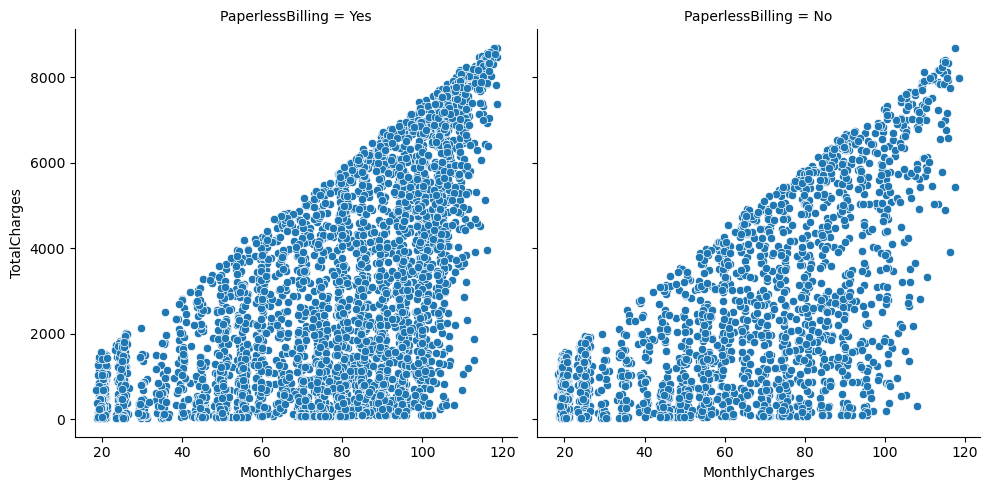

In [37]:
sns.relplot(x='MonthlyCharges',y='TotalCharges',col='PaperlessBilling',data=data,kind='scatter')

C:\Users\91702\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


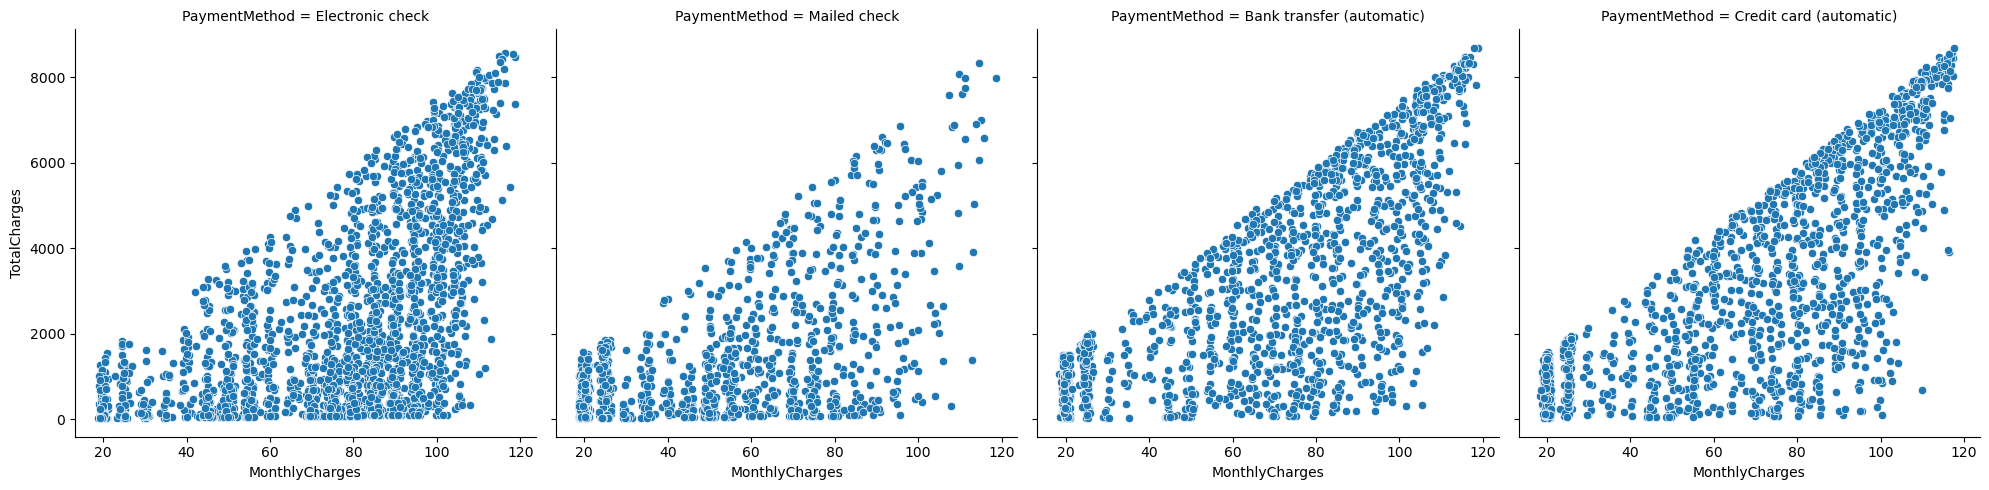

In [38]:
sns.relplot(x='MonthlyCharges',y='TotalCharges',col='PaymentMethod',data=data,kind='scatter')

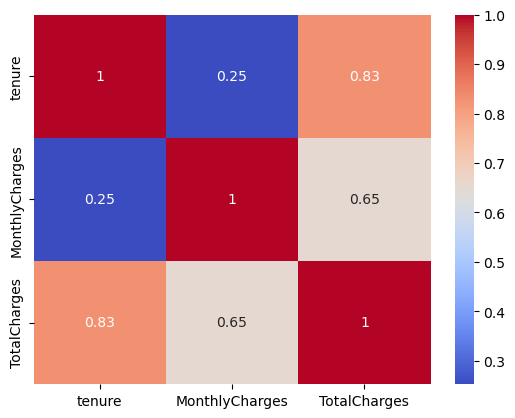

In [42]:
sns.heatmap(xtrain[['tenure','MonthlyCharges','TotalCharges']].corr(), cmap = "coolwarm", annot = True)
plt.show()

In [41]:
xtrain[['tenure','MonthlyCharges','TotalCharges']].corr()

tenure  MonthlyCharges  TotalCharges
tenure          1.000000        0.252588      0.827960
MonthlyCharges  0.252588        1.000000      0.652003
TotalCharges    0.827960        0.652003      1.000000